# Setup environment

Tested on Python 3.10.2

In [1]:
!python -m venv venv
!source venv/bin/activate
!python -m pip install --upgrade pip
!pip install -r requirements.txt

In [2]:
import pandas as pd
from main import Data, Network, SearchSpace, SearchStrategy, Estimator, Experiment
import numpy as np

# Load dataset

## Seeds dataset

210 entries

    area  asymmetry_coefficient
0  15.26                  2.221
1  14.88                  1.018
2  14.29                  2.699
3  13.84                  2.259
4  16.14                  1.355


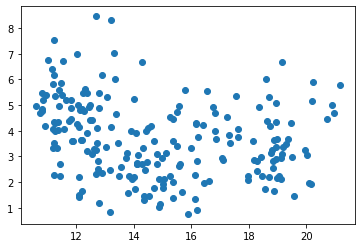

In [3]:
params: dict = {
    "filepath_or_buffer": "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",
    "names": [
        'area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel', 'asymmetry_coefficient',
        'length_kernel_groove', 'target'
    ],
    "usecols": [0, 5],
    "sep": "\t+",
    
}
seeds: pd.DataFrame = Data.load_from_url(verbose=True, **params)
Data.plot(x=seeds.area, y=seeds.asymmetry_coefficient)

## Asia-Pacific Economic Outlook

Asia and Pacific regional economic outlook including multiple indicators from 2013-2021. [Source](https://data.world/data-society/asia-pacific-economic-outlook)

368 entries

        2013       2021
0   0.200799   6.074727
1   5.390545   4.849560
2   1.578705   3.840477
3  19.266017  13.015151
4 -15.212637   0.861616


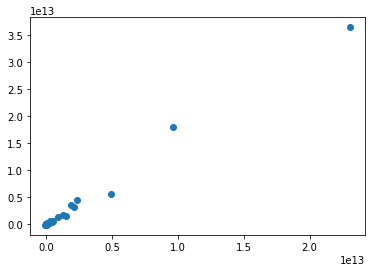

In [4]:
params: dict = {
    "filepath_or_buffer": "https://query.data.world/s/murkcrhqzyhs5pt3gevtepxhpkkqz2",
    "usecols": ["2013", "2021"],
}
asia: pd.DataFrame = Data.load_from_url(verbose=True, **params)
asia.columns = ['thirteen', 'twenty_one']
Data.plot(x=asia.thirteen, y=asia.twenty_one)

# California Housing Prices

   longitude  latitude
0    -122.23     37.88
1    -122.22     37.86
2    -122.24     37.85
3    -122.25     37.85
4    -122.25     37.85


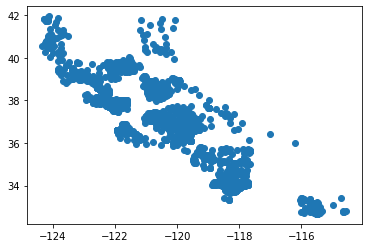

In [5]:
params: dict = {
    # "filepath_or_buffer": "datasets/housing.csv",
    "filepath_or_buffer": "./datasets/housing.csv",
    "usecols": ["longitude", "latitude"],
}
housing: pd.DataFrame = Data.load_from_url(verbose=True, **params)[:10000]
Data.plot(x=housing.longitude, y=housing.latitude)

# Normalize data

       area  asymmetry_coefficient
0  0.142098              -0.986152
1  0.011188              -1.788166
2 -0.192067              -0.667479
3 -0.347091              -0.960818
4  0.445257              -1.563495


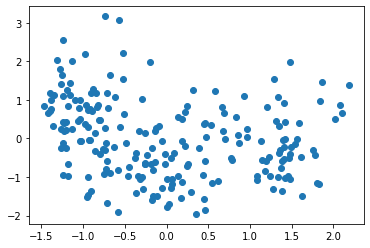

In [6]:
seeds_normalized: pd.DataFrame = Data.normalize(data=seeds, verbose=True)
Data.plot(x=seeds_normalized.area, y=seeds_normalized.asymmetry_coefficient)

   thirteen  twenty_one
0  -0.10368   -0.102261
1  -0.10368   -0.102261
2  -0.10368   -0.102261
3  -0.10368   -0.102261
4  -0.10368   -0.102261


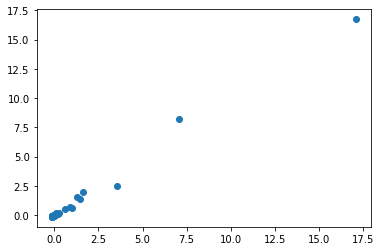

In [7]:
asia_normalized: pd.DataFrame = Data.normalize(data=asia, verbose=True)
Data.plot(x=asia_normalized.thirteen, y=asia_normalized.twenty_one)

   longitude  latitude
0  -1.524567  1.217782
1  -1.519039  1.207575
2  -1.530096  1.202472
3  -1.535624  1.202472
4  -1.535624  1.202472


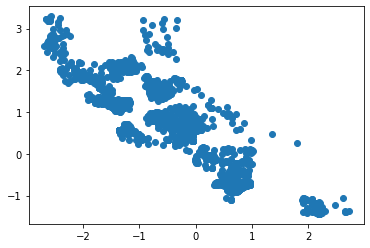

In [8]:
housing_normalized: pd.DataFrame = Data.normalize(data=housing, verbose=True)
Data.plot(x=housing_normalized.longitude, y=housing_normalized.latitude)

# Initialize Base Network Model

In [9]:
seeds_som: Network = Network(data=seeds_normalized)

Network with following parameters was created {'x': 8, 'y': 2, 'input_len': 2, 'sigma': 0.5, 'learning_rate': 0.5, 'neighborhood_function': 'gaussian', 'activation_distance': 'euclidean', 'random_seed': 10}


In [10]:
asia_som: Network = Network(data=asia_normalized)

Network with following parameters was created {'x': 9, 'y': 2, 'input_len': 2, 'sigma': 0.5, 'learning_rate': 0.5, 'neighborhood_function': 'gaussian', 'activation_distance': 'euclidean', 'random_seed': 10}


In [11]:
housing_som: Network = Network(data=housing_normalized)

Network with following parameters was created {'x': 22, 'y': 2, 'input_len': 2, 'sigma': 0.5, 'learning_rate': 0.5, 'neighborhood_function': 'gaussian', 'activation_distance': 'euclidean', 'random_seed': 10}


In [12]:
print(seeds_normalized.shape[0], "x", seeds_normalized.shape[1])
print(asia_normalized.shape[0], "x", asia_normalized.shape[1])
print(housing_normalized.shape[0], "x", housing_normalized.shape[1])

210 x 2
368 x 2
10000 x 2


# Train Base Network Model

In [13]:
seeds_dataset: np.array = np.array(seeds_normalized)
asia_dataset: np.array = np.array(asia_normalized)
housing_dataset: np.array = np.array(housing_normalized)
    
n_iters: int = 500

# seeds_som.net.train_random(data=seeds_dataset, num_iteration=n_iters)
seeds_som.train(data=seeds_dataset, n_iters=n_iters)
seeds_error: float = Estimator.compute_quantization_error(net=seeds_som.net, data=seeds_dataset)
print("Quantization Error for seeds_dataset", seeds_error)
    
seeds_winner_neuron: np.array = seeds_som.get_winner_neuron_coord()  # bi-dimensional
seeds_cluster_index: np.array = seeds_som.get_cluster_index()  # mono-dimensional

# asia_som.net.train_random(data=asia_dataset, num_iteration=n_iters)
asia_som.train(data=asia_dataset, n_iters=n_iters)
asia_error: float = Estimator.compute_quantization_error(net=asia_som.net, data=asia_dataset)
print("Quantization error for asia_economic_dataset", asia_error)

asia_winner_neuron: np.array = asia_som.get_winner_neuron_coord()  # bi-dimensional
asia_cluster_index: np.array = asia_som.get_cluster_index()  # mono-dimensional
    
housing_som.train(data=housing_dataset, n_iters=n_iters)
housing_error: float = Estimator.compute_quantization_error(net=housing_som.net, data=housing_dataset)
print("Quantization error for asia_economic_dataset", housing_error)

housing_winner_neuron: np.array = housing_som.get_winner_neuron_coord()  # bi-dimensional
housing_cluster_index: np.array = housing_som.get_cluster_index()  # mono-dimensional

Quantization Error for seeds_dataset 0.3256392566829546
Quantization error for asia_economic_dataset 0.056357377272961084
Quantization error for asia_economic_dataset 0.20590357075878518


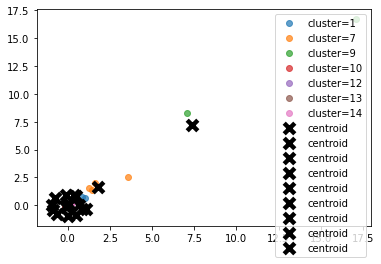

In [14]:
asia_som.plot_clusters(asia_dataset, asia_cluster_index)

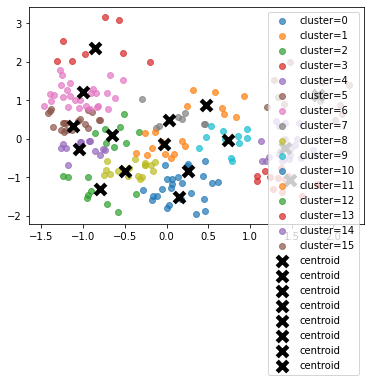

In [15]:
seeds_som.plot_clusters(seeds_dataset, seeds_cluster_index)

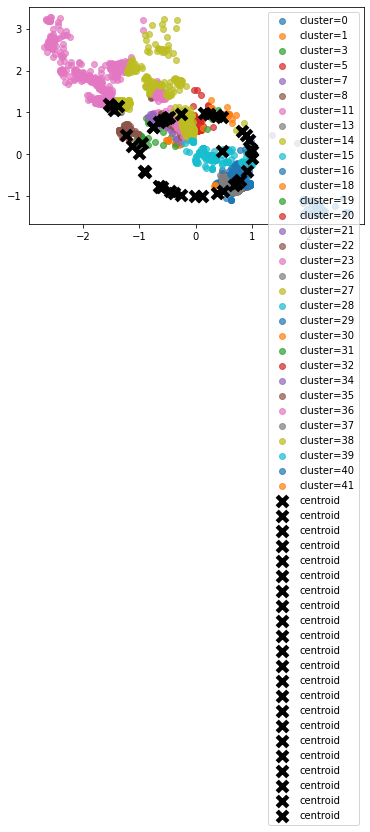

In [16]:
housing_som.plot_clusters(housing_dataset, housing_cluster_index)

# Search

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 83.28trial/s, best loss: 0.5268633199250322]
best: {'activation_distance': 1, 'learning_rate': 2.0404659841515054, 'neighborhood_function': 2, 'sig': 0.5849311966123695}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5836359930789762, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [2.547483519893612], 'neighborhood_function': [3], 'sig': [0.690307315509298]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 38, 35, 882000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 38, 35, 883000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5512932045953005, 'status': 'ok'},

/home/renatk/Documents/diploma/auto-clustering/clustering-algorithms/auto-som/venv/lib/python3.10/site-packages/minisom.py:203: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +


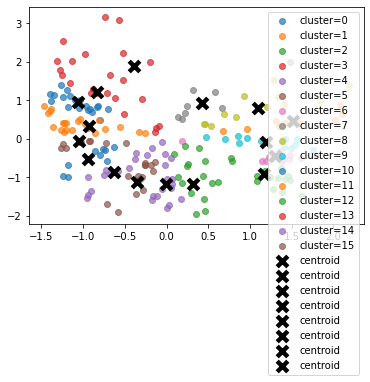

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 84.16trial/s, best loss: 0.5229700374720774]
best: {'activation_distance': 0, 'learning_rate': 2.212638303130807, 'neighborhood_function': 2, 'sig': 0.7046828357703631}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.574318713875779, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [3.3554413481742875], 'neighborhood_function': [0], 'sig': [0.8556809343243215]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 38, 42, 621000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 38, 42, 623000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5546021435492767, 'status': 'ok'},

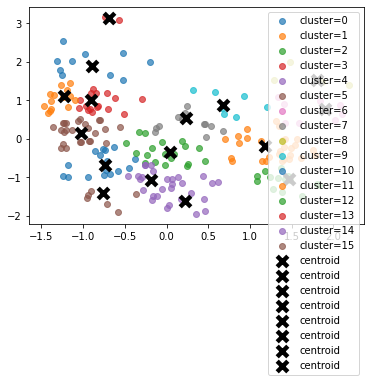

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 85.32trial/s, best loss: 0.5248397299354144]
best: {'activation_distance': 1, 'learning_rate': 1.2807794666029553, 'neighborhood_function': 3, 'sig': 0.8024550961522134}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5471455445064253, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [0.727565723596873], 'neighborhood_function': [1], 'sig': [0.19353202050257587]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 38, 49, 279000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 38, 49, 282000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5718686703226129, 'status': 'ok'

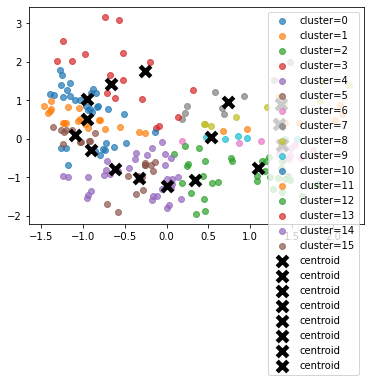

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 83.83trial/s, best loss: 0.5264470863459914]
best: {'activation_distance': 3, 'learning_rate': 3.7023157625507914, 'neighborhood_function': 0, 'sig': 0.8608286142424588}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.7190248972246713, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [1], 'learning_rate': [4.950191050657798], 'neighborhood_function': [1], 'sig': [0.28241561914934404]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 38, 55, 941000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 38, 55, 943000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5992959657038426, 'status': 'ok'

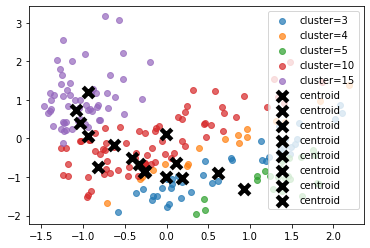

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 83.05trial/s, best loss: 0.5258589367272423]
best: {'activation_distance': 0, 'learning_rate': 0.6508604110083859, 'neighborhood_function': 1, 'sig': 0.3500041628284366}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5599105049488958, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [1], 'learning_rate': [0.5911387635548531], 'neighborhood_function': [3], 'sig': [0.7771083387421278]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 2, 369000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 2, 371000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.6315894142292099, 'status': 'ok'},

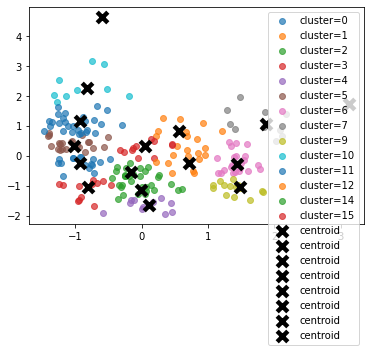

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 93.36trial/s, best loss: 0.5275384020610198]
best: {'activation_distance': 2, 'learning_rate': 3.0240249414056133, 'neighborhood_function': 0, 'sig': 0.05156167816690274}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5908881255955638, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [1.1327727160118624], 'neighborhood_function': [1], 'sig': [0.7649517980711928]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 9, 10000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 9, 12000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5569438013327016, 'status': 'ok'}, 

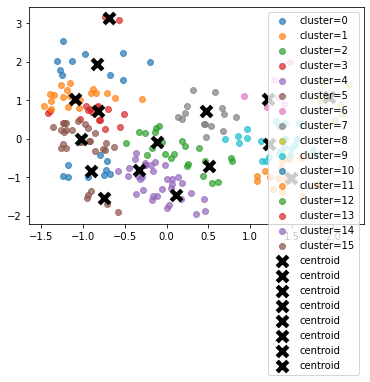

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 95.03trial/s, best loss: 0.5278219564660286]
best: {'activation_distance': 3, 'learning_rate': 3.589192127511299, 'neighborhood_function': 1, 'sig': 0.446518894479426}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5795033503653197, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [1], 'learning_rate': [4.4988423435364], 'neighborhood_function': [1], 'sig': [0.5051616922055526]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 15, 42000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 15, 44000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5585575898172981, 'status': 'ok'}, 'mis

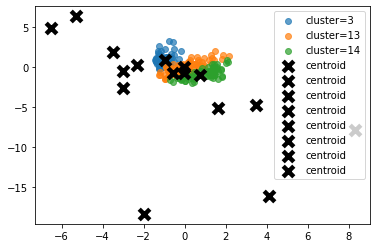

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 92.92trial/s, best loss: 0.5284613812434578]
best: {'activation_distance': 0, 'learning_rate': 3.6978434437116645, 'neighborhood_function': 3, 'sig': 0.709058539056821}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5598204472304356, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [1], 'learning_rate': [4.201857197229013], 'neighborhood_function': [2], 'sig': [0.7918526066443141]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 20, 676000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 20, 678000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5418481421784748, 'status': 'ok'},

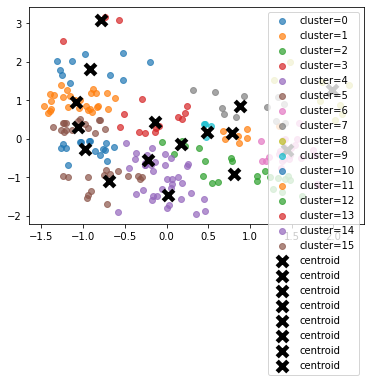

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 93.27trial/s, best loss: 0.5284872645549614]
best: {'activation_distance': 1, 'learning_rate': 1.8641962118946782, 'neighborhood_function': 1, 'sig': 0.32451484823950477}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5709140911125625, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [0], 'learning_rate': [0.30758207756523914], 'neighborhood_function': [1], 'sig': [0.636542358038557]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 26, 800000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 26, 802000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.6338854540660054, 'status': 'ok

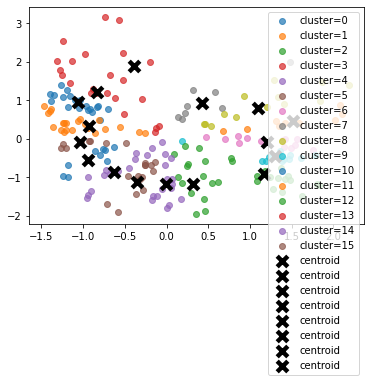

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 94.74trial/s, best loss: 0.528344119106015]
best: {'activation_distance': 1, 'learning_rate': 0.7536660464436757, 'neighborhood_function': 2, 'sig': 0.3754592472167303}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.570055338029579, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [2], 'learning_rate': [0.5294744590781826], 'neighborhood_function': [1], 'sig': [0.5914674165591104]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 32, 856000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 32, 858000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5788002860567215, 'status': 'ok'}

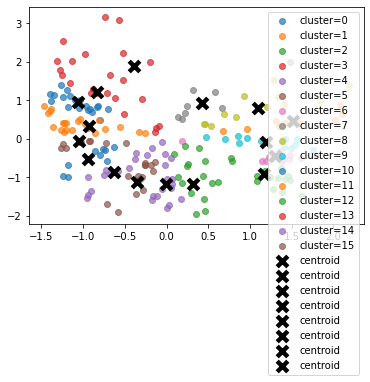

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 90.52trial/s, best loss: 0.5281576944981815]
best: {'activation_distance': 3, 'learning_rate': 2.7204571683691556, 'neighborhood_function': 3, 'sig': 0.44861223176511594}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5717675280802057, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [2], 'learning_rate': [4.147454017780302], 'neighborhood_function': [1], 'sig': [0.6488045044619034]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 38, 836000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 38, 837000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5671500072703236, 'status': 'ok'

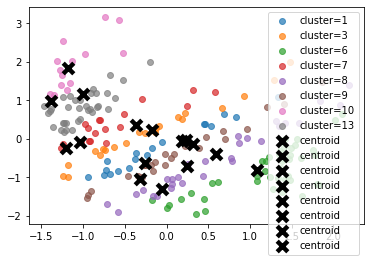

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 85.23trial/s, best loss: 0.5298945225941356]
best: {'activation_distance': 3, 'learning_rate': 0.5386450785645556, 'neighborhood_function': 1, 'sig': 0.7536237619348671}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.6162853926187896, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [0.4491691223698869], 'neighborhood_function': [1], 'sig': [0.15018428527018862]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 44, 893000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 44, 895000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5552264082783573, 'status': 'ok

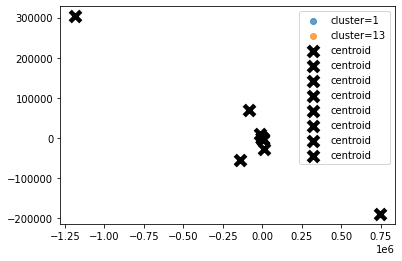

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 88.79trial/s, best loss: 0.5330484440314381]
best: {'activation_distance': 0, 'learning_rate': 4.695403341111167, 'neighborhood_function': 1, 'sig': 0.2873090267036504}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5880039832289125, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [0], 'learning_rate': [4.272932785428415], 'neighborhood_function': [3], 'sig': [0.5630877411771803]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 51, 139000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 51, 141000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5445880443338997, 'status': 'ok'},

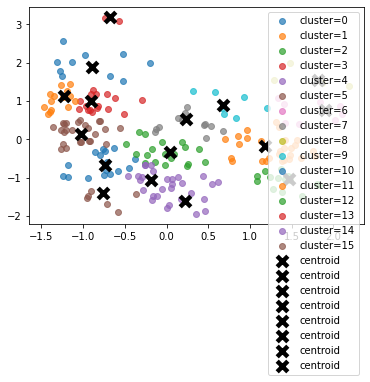

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 93.49trial/s, best loss: 0.5286729235683609]
best: {'activation_distance': 3, 'learning_rate': 2.857257262733677, 'neighborhood_function': 3, 'sig': 0.4933160729472835}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5574679479273865, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [2], 'learning_rate': [3.7537968523855705], 'neighborhood_function': [0], 'sig': [0.44807630029702694]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 39, 57, 455000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 39, 57, 457000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5529211080557996, 'status': 'ok'

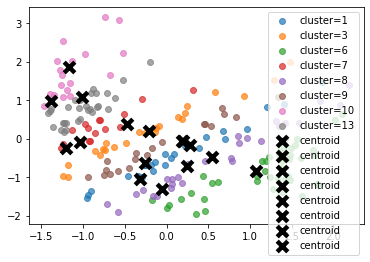

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 94.72trial/s, best loss: 0.5317089118632335]
best: {'activation_distance': 3, 'learning_rate': 3.292570294405662, 'neighborhood_function': 0, 'sig': 0.4628569587716628}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5981777175624344, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [2], 'learning_rate': [1.2596846969588202], 'neighborhood_function': [1], 'sig': [0.3049633984638742]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 40, 3, 343000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 40, 3, 345000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5770269140379003, 'status': 'ok'}, 

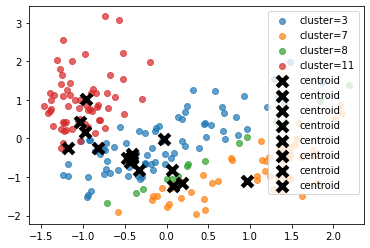

{0.38989705446056416: {'x': 8,
  'y': 2,
  'input_len': 2,
  'sigma': 0.3754592472167303,
  'learning_rate': 0.7536660464436757,
  'neighborhood_function': 'bubble',
  'activation_distance': 'cosine'},
 0.33064237247787687: {'x': 8,
  'y': 2,
  'input_len': 2,
  'sigma': 0.7046828357703631,
  'learning_rate': 2.212638303130807,
  'neighborhood_function': 'bubble',
  'activation_distance': 'euclidean'},
 0.38159700071592645: {'x': 8,
  'y': 2,
  'input_len': 2,
  'sigma': 0.8024550961522134,
  'learning_rate': 1.2807794666029553,
  'neighborhood_function': 'triangle',
  'activation_distance': 'cosine'},
 0.5783911219740102: {'x': 8,
  'y': 2,
  'input_len': 2,
  'sigma': 0.8608286142424588,
  'learning_rate': 3.7023157625507914,
  'neighborhood_function': 'gaussian',
  'activation_distance': 'chebyshev'},
 0.33391895857163667: {'x': 8,
  'y': 2,
  'input_len': 2,
  'sigma': 0.3500041628284366,
  'learning_rate': 0.6508604110083859,
  'neighborhood_function': 'mexican_hat',
  'activation

In [17]:
seeds_archs: dict = SearchStrategy.random_search(seeds_som, seeds_dataset)
seeds_archs

In [50]:
auto_som_seeds_best_error: float = min(seeds_archs.keys())
seeds_best: dict = seeds_archs[auto_som_seeds_best_error]
auto_som_seeds_best_error, seeds_best

(0.32339926992132895,
 {'x': 8,
  'y': 2,
  'input_len': 2,
  'sigma': 0.05156167816690274,
  'learning_rate': 3.0240249414056133,
  'neighborhood_function': 'gaussian',
  'activation_distance': 'manhattan'})

In [ ]:
import pickle
with open('2022-05-16 09:57:09.122088_som.p', 'rb') as infile:
    loaded_som = pickle.load(infile)
win = loaded_som.net.winner(np.array([-0.75, 3.01]))
win

loaded_cluster_index = np.ravel_multi_index(win, (loaded_som.x, loaded_som.y))
loaded_cluster_index

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 92.75trial/s, best loss: 0.9445376383194256]
best: {'activation_distance': 0, 'learning_rate': 1.8775379549391227, 'neighborhood_function': 2, 'sig': 0.845187203410538}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.949189825891407, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [0], 'learning_rate': [4.3261358587632035], 'neighborhood_function': [1], 'sig': [0.23719043332062847]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 40, 9, 35000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 40, 9, 37000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.9475442123469798, 'status': 'ok'}, 'm

/home/renatk/Documents/diploma/auto-clustering/clustering-algorithms/auto-som/venv/lib/python3.10/site-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


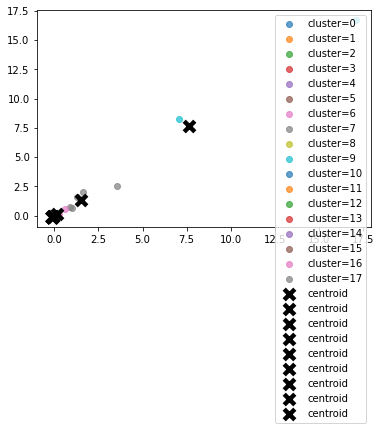

{0.05668834367353777: {'x': 9,
  'y': 2,
  'input_len': 2,
  'sigma': 0.845187203410538,
  'learning_rate': 1.8775379549391227,
  'neighborhood_function': 'bubble',
  'activation_distance': 'euclidean'}}

In [18]:
asia_archs: dict = SearchStrategy.random_search(asia_som, asia_dataset)
asia_archs

In [51]:
auto_som_asia_best_error: float = min(asia_archs.keys())
asia_best: dict = asia_archs[auto_som_asia_best_error]
auto_som_asia_best_error, asia_best

(0.05668834367353777,
 {'x': 9,
  'y': 2,
  'input_len': 2,
  'sigma': 0.845187203410538,
  'learning_rate': 1.8775379549391227,
  'neighborhood_function': 'bubble',
  'activation_distance': 'euclidean'})

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 22.90trial/s, best loss: 0.4145555785017009]
best: {'activation_distance': 2, 'learning_rate': 3.9057838752281437, 'neighborhood_function': 1, 'sig': 0.47212845657738034}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.42059375802171345, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [2], 'learning_rate': [4.669147814342641], 'neighborhood_function': [3], 'sig': [0.978683247753843]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 40, 15, 217000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 40, 15, 235000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.41623816238797856, 'status': 'ok

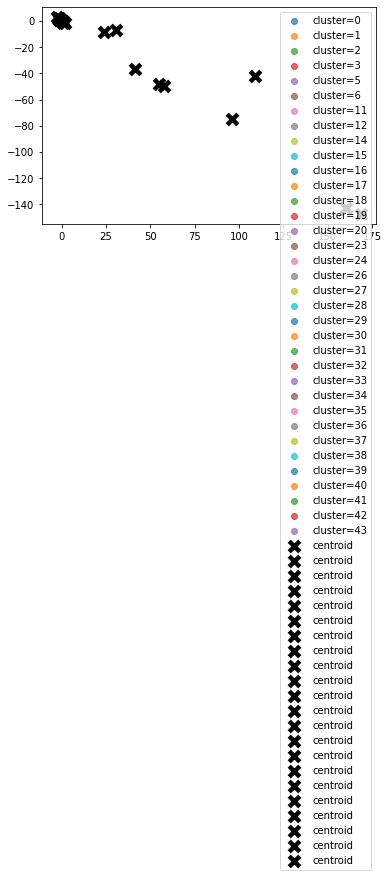

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:22<00:00, 22.19trial/s, best loss: 0.4146455711540522]
best: {'activation_distance': 2, 'learning_rate': 4.816894404732797, 'neighborhood_function': 2, 'sig': 0.8367267190109514}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4436380267693025, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [2.810510189173187], 'neighborhood_function': [0], 'sig': [0.5397729778492637]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 40, 39, 193000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 40, 39, 210000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.4239360705363991, 'status': 'ok'},

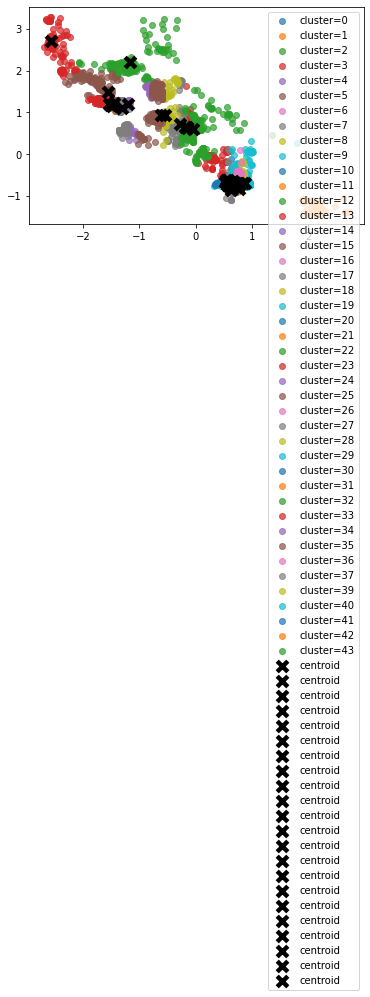

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 22.89trial/s, best loss: 0.4142475193421803]
best: {'activation_distance': 0, 'learning_rate': 1.7854460490311692, 'neighborhood_function': 3, 'sig': 0.6546927109512366}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4181924087823628, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [0], 'learning_rate': [0.8613586588919538], 'neighborhood_function': [3], 'sig': [0.4997100005874705]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 41, 3, 947000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 41, 3, 968000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.42385722044221563, 'status': 'ok'}

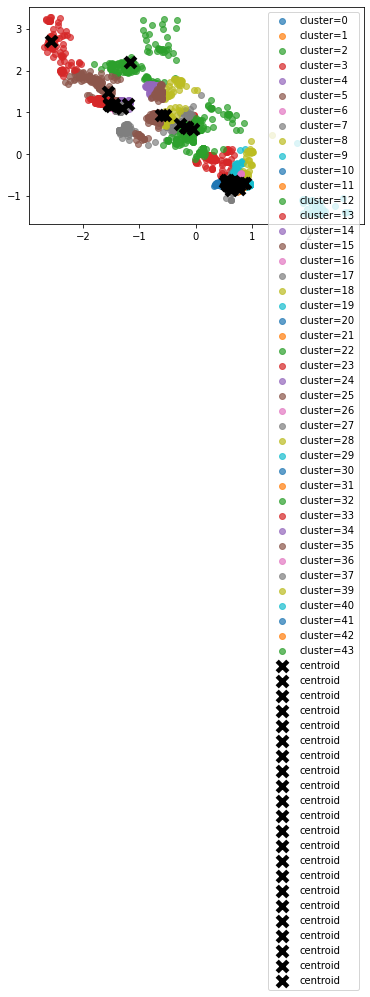

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 22.81trial/s, best loss: 0.41439926192509385]
best: {'activation_distance': 0, 'learning_rate': 1.4357712918872088, 'neighborhood_function': 2, 'sig': 0.35263257815849036}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4153215559401335, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [0], 'learning_rate': [2.9387937866191645], 'neighborhood_function': [2], 'sig': [0.5072898036576525]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 41, 28, 156000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 41, 28, 173000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.418342267301214, 'status': 'ok'

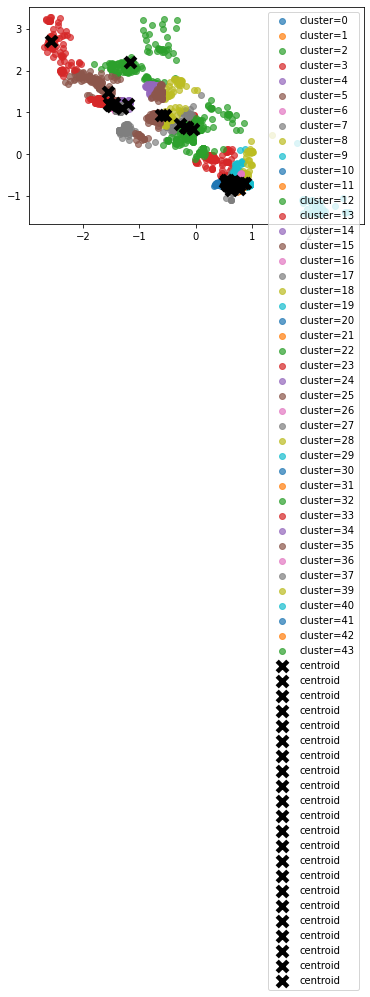

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.30trial/s, best loss: 0.414635182271814]
best: {'activation_distance': 1, 'learning_rate': 3.5685077191874854, 'neighborhood_function': 0, 'sig': 0.24741198892810956}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4176337820561287, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [3.0621615137360934], 'neighborhood_function': [2], 'sig': [0.21268727793223058]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 41, 52, 322000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 41, 52, 347000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.44016933850891526, 'status': '

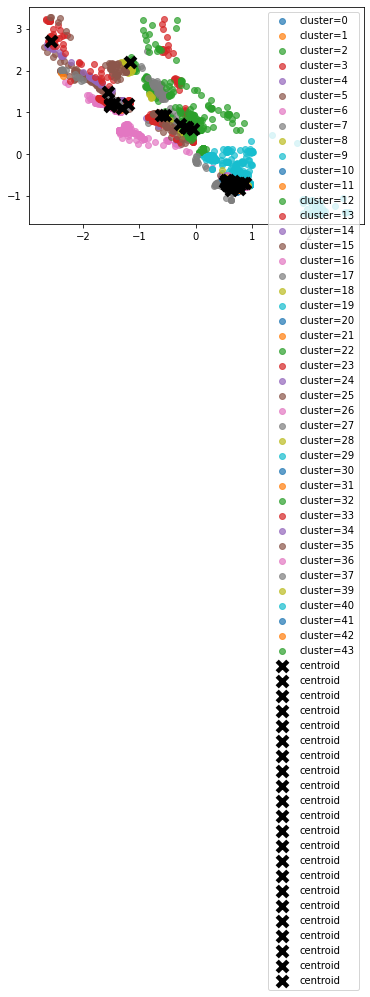

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:22<00:00, 22.46trial/s, best loss: 0.41423822777219466]
best: {'activation_distance': 2, 'learning_rate': 2.029138511261809, 'neighborhood_function': 0, 'sig': 0.0012538740706675225}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4174369001042251, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [1.1038836001641357], 'neighborhood_function': [1], 'sig': [0.2869068626826337]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 42, 16, 474000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 42, 16, 500000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.4223396047779777, 'status': 'o

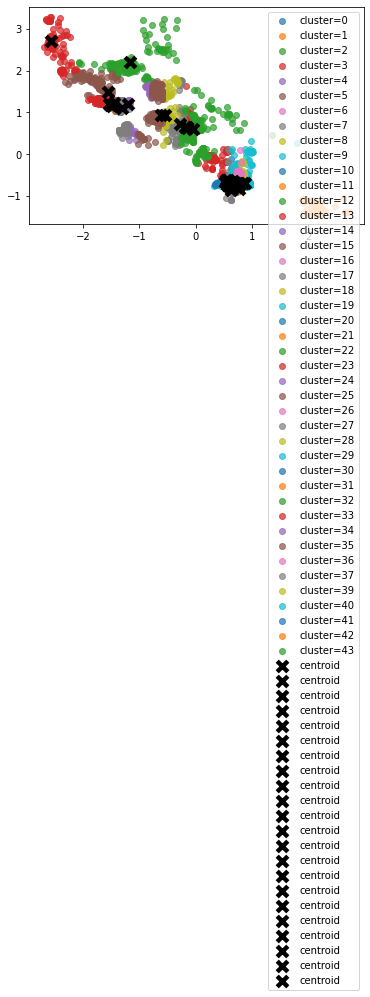

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.00trial/s, best loss: 0.4143027852779781]
best: {'activation_distance': 1, 'learning_rate': 0.02197922617667547, 'neighborhood_function': 3, 'sig': 0.4832108960576966}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.42711588219747854, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [0.942848446223281], 'neighborhood_function': [1], 'sig': [0.6999545754763904]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 42, 41, 43000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 42, 41, 58000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.42100055031802386, 'status': 'ok'

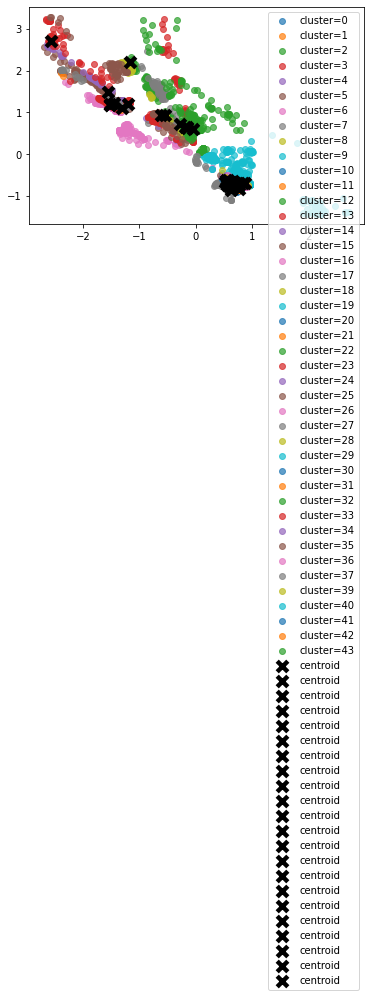

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.38trial/s, best loss: 0.4147293845604576]
best: {'activation_distance': 0, 'learning_rate': 4.089097818452672, 'neighborhood_function': 1, 'sig': 0.8029826487405067}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4341500158422209, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [2], 'learning_rate': [1.3605911102015447], 'neighborhood_function': [3], 'sig': [0.36864587737926796]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 43, 5, 355000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 43, 5, 378000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.416764396959432, 'status': 'ok'}, 

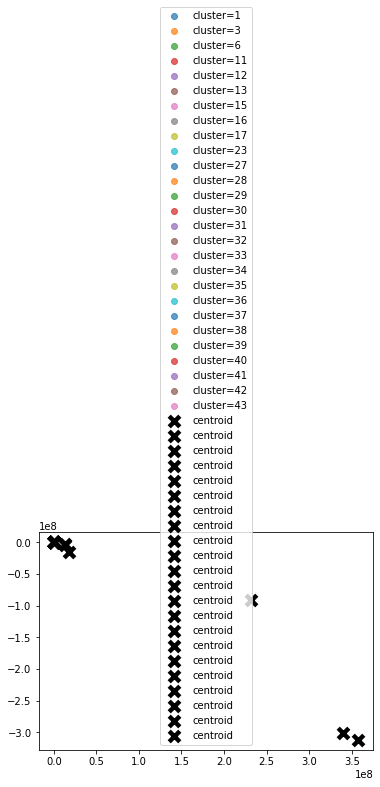

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.07trial/s, best loss: 0.41427253226594546]
best: {'activation_distance': 0, 'learning_rate': 3.8043662034011145, 'neighborhood_function': 2, 'sig': 0.5195559686225317}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.5636955183132216, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [3.116070939107659], 'neighborhood_function': [0], 'sig': [0.7055413416818276]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 43, 28, 543000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 43, 28, 558000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.42722520149670073, 'status': 'ok'

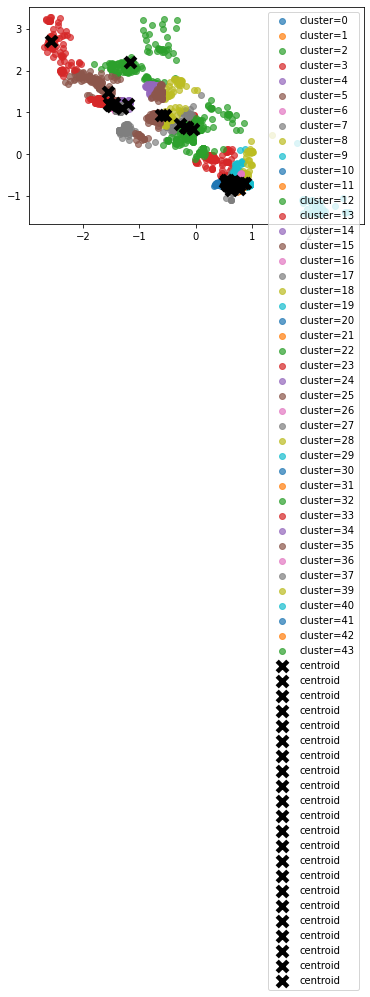

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.22trial/s, best loss: 0.41381729722624633]
best: {'activation_distance': 3, 'learning_rate': 1.6653022888315543, 'neighborhood_function': 1, 'sig': 0.5985384022197534}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4195932331349288, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [2], 'learning_rate': [2.014304588083328], 'neighborhood_function': [0], 'sig': [0.10302348868664075]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 43, 52, 547000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 43, 52, 563000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.4265655090111957, 'status': 'ok'

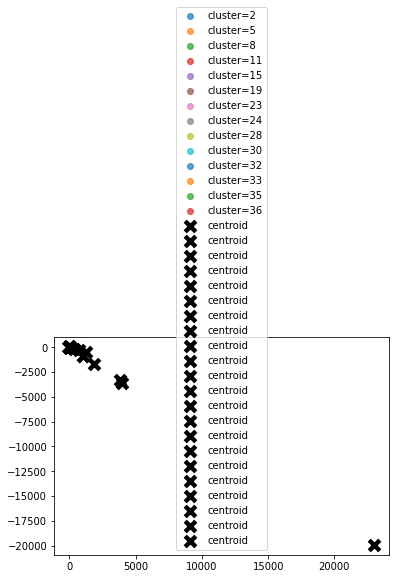

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:23<00:00, 21.12trial/s, best loss: 0.4148730633662783]
best: {'activation_distance': 0, 'learning_rate': 1.1435106918238969, 'neighborhood_function': 2, 'sig': 0.324640380570992}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4178963211475715, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [1], 'learning_rate': [2.8573954972814053], 'neighborhood_function': [1], 'sig': [0.18767412987738177]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 44, 15, 574000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 44, 15, 591000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.4319418188148779, 'status': 'ok'

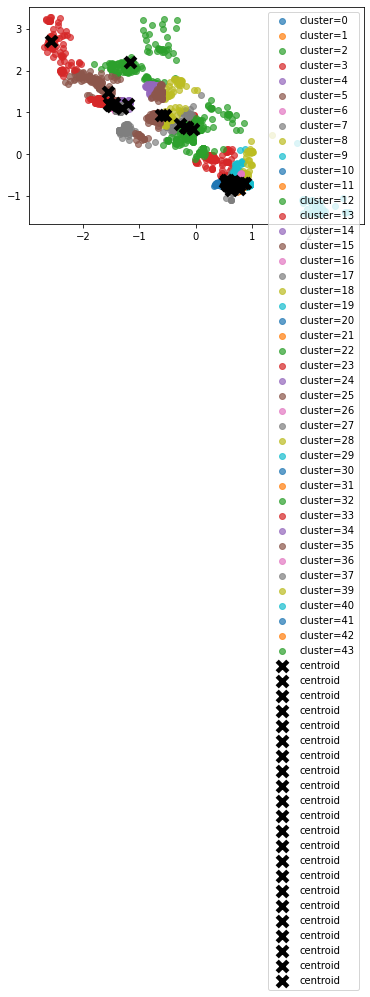

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.00trial/s, best loss: 0.414688225620772]
best: {'activation_distance': 3, 'learning_rate': 1.418794961223696, 'neighborhood_function': 3, 'sig': 0.9604154770483471}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4334946354531825, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [1], 'learning_rate': [2.522526892928631], 'neighborhood_function': [0], 'sig': [0.04333828352196058]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 44, 41, 670000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 44, 41, 686000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.42108531632345175, 'status': 'ok'

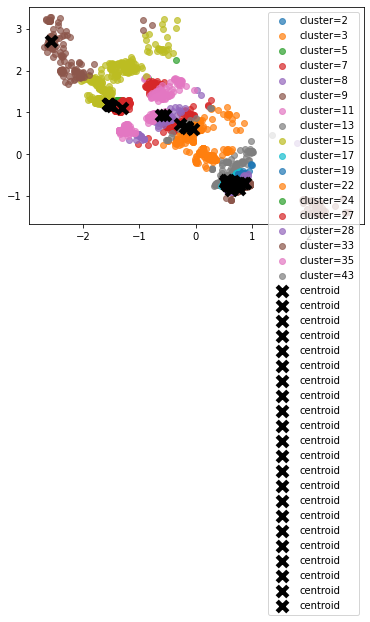

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.64trial/s, best loss: 0.41427306719202095]
best: {'activation_distance': 0, 'learning_rate': 3.8901842508236957, 'neighborhood_function': 1, 'sig': 0.6767631079033642}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.42543682798525695, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [1], 'learning_rate': [0.2538978815014456], 'neighborhood_function': [3], 'sig': [0.9317021987300533]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 45, 5, 8000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 45, 5, 25000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.4208598108192162, 'status': 'ok'}, '

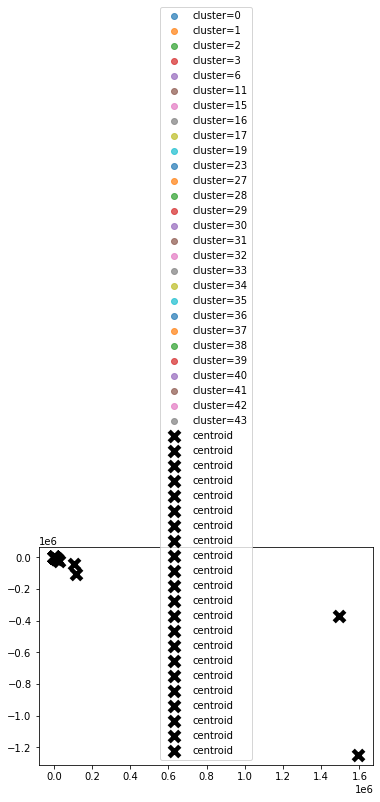

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.34trial/s, best loss: 0.4145130725588293]
best: {'activation_distance': 2, 'learning_rate': 3.7657726737798125, 'neighborhood_function': 0, 'sig': 0.768114021836815}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4307582328265345, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [3], 'learning_rate': [0.7235755716333092], 'neighborhood_function': [1], 'sig': [0.6786658433039081]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 45, 27, 936000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 45, 27, 953000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.4151713365115724, 'status': 'ok'}

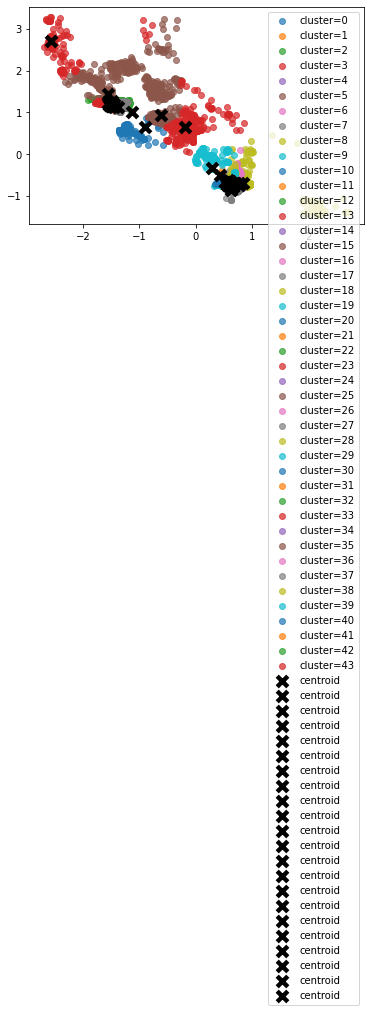

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.20trial/s, best loss: 0.4143858220848993]
best: {'activation_distance': 1, 'learning_rate': 3.067836743760563, 'neighborhood_function': 2, 'sig': 0.6382560931351886}
0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.4457049880463918, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'activation_distance': [0], 'learning_rate': [0], 'neighborhood_function': [0], 'sig': [0]}, 'vals': {'activation_distance': [0], 'learning_rate': [1.653670033701221], 'neighborhood_function': [1], 'sig': [0.36938530300561306]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 14, 1, 45, 51, 609000), 'refresh_time': datetime.datetime(2022, 4, 14, 1, 45, 51, 634000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.4183311449458375, 'status': 'ok'}

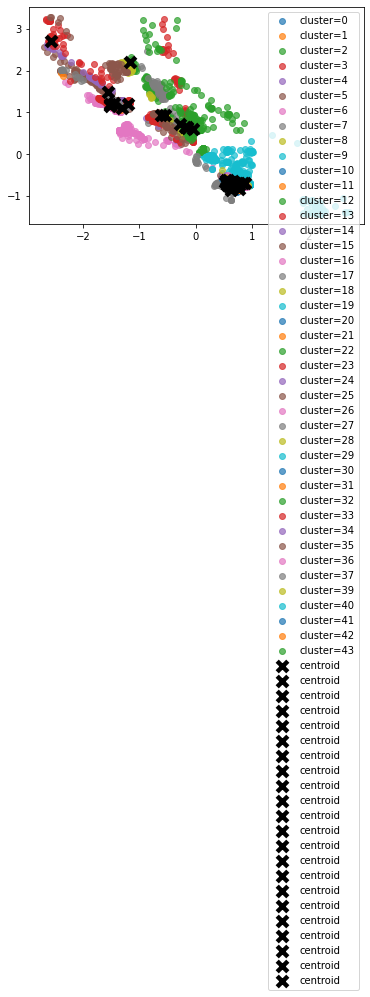

{0.10952208734043116: {'x': 22,
  'y': 2,
  'input_len': 2,
  'sigma': 0.47212845657738034,
  'learning_rate': 3.9057838752281437,
  'neighborhood_function': 'mexican_hat',
  'activation_distance': 'manhattan'},
 0.12012368264897548: {'x': 22,
  'y': 2,
  'input_len': 2,
  'sigma': 0.0012538740706675225,
  'learning_rate': 2.029138511261809,
  'neighborhood_function': 'gaussian',
  'activation_distance': 'manhattan'},
 0.1205953201532822: {'x': 22,
  'y': 2,
  'input_len': 2,
  'sigma': 0.6546927109512366,
  'learning_rate': 1.7854460490311692,
  'neighborhood_function': 'triangle',
  'activation_distance': 'euclidean'},
 0.12012127717832459: {'x': 22,
  'y': 2,
  'input_len': 2,
  'sigma': 0.324640380570992,
  'learning_rate': 1.1435106918238969,
  'neighborhood_function': 'bubble',
  'activation_distance': 'euclidean'},
 0.12125467910140389: {'x': 22,
  'y': 2,
  'input_len': 2,
  'sigma': 0.24741198892810956,
  'learning_rate': 3.5685077191874854,
  'neighborhood_function': 'gaussia

In [19]:
housing_archs: dict = SearchStrategy.random_search(housing_som, housing_dataset)
housing_archs

In [52]:
auto_som_housing_best_error: float = min(housing_archs.keys())
housing_best: dict = housing_archs[auto_som_housing_best_error]
auto_som_housing_best_error, housing_best

(0.10952208734043116,
 {'x': 22,
  'y': 2,
  'input_len': 2,
  'sigma': 0.47212845657738034,
  'learning_rate': 3.9057838752281437,
  'neighborhood_function': 'mexican_hat',
  'activation_distance': 'manhattan'})

# KMeans++

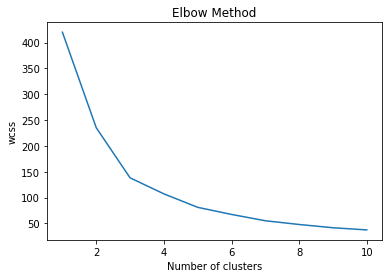

In [20]:
Experiment.kmeans_elbow(seeds_dataset)

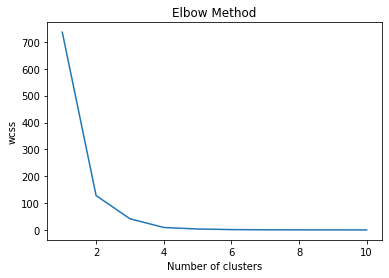

In [21]:
Experiment.kmeans_elbow(asia_dataset)

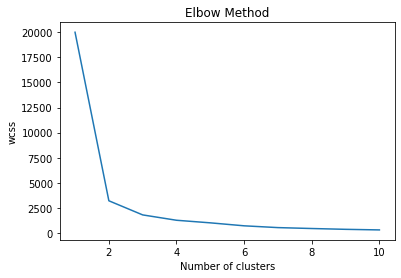

In [22]:
Experiment.kmeans_elbow(housing_dataset)

In order to compare quantization errors objectively same number of clusters should be used

- for SOM (seeds_dataset) 8*2=16
- for KMeans 16

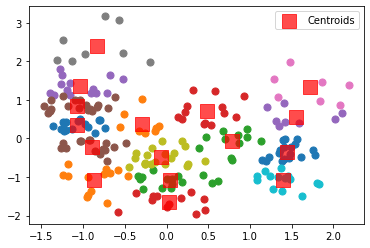

In [23]:
seeds_km, seeds_y_means = Experiment.kmeans(seeds_dataset, 16)

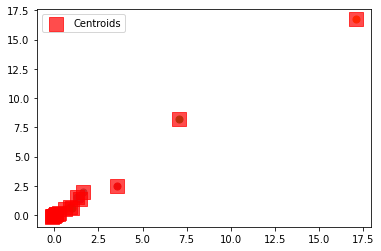

In [24]:
asia_km, asia_y_means = Experiment.kmeans(asia_dataset, 18)

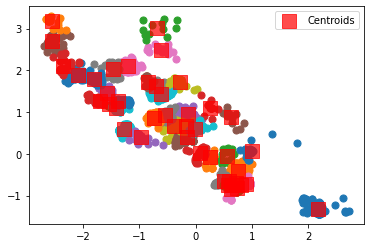

In [25]:
housing_km, housing_y_means = Experiment.kmeans(housing_dataset, 44)

# Estimate KMeans++

In [26]:
seeds_centroids = np.array([seeds_km.cluster_centers_[label] for label in seeds_y_means])
quantization_error: float = Estimator.compute_quantization_error_manually(data=seeds_dataset, centroids=seeds_centroids)
quantization_error   

0.3027435204245

In [27]:
asia_centroids = np.array([asia_km.cluster_centers_[label] for label in asia_y_means])
quantization_error: float = Estimator.compute_quantization_error_manually(data=asia_dataset, centroids=asia_centroids)
quantization_error 

0.0017193773573026408

In [28]:
housing_centroids = np.array([housing_km.cluster_centers_[label] for label in housing_y_means])
quantization_error: float = Estimator.compute_quantization_error_manually(data=housing_dataset, centroids=housing_centroids)
quantization_error 

0.05114287836703665

# KMeans Random

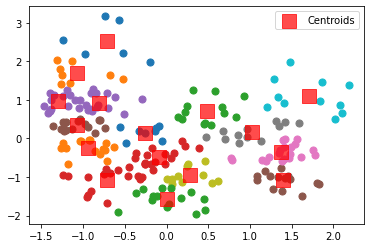

In [29]:
seeds_km_rand, seeds_y_means_rand = Experiment.kmeans(data=seeds_dataset, n_clusters=16, init='random')

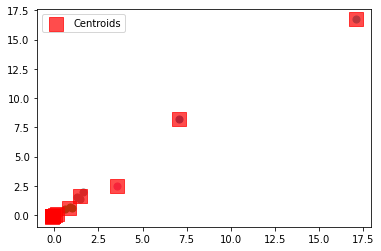

In [30]:
asia_km_rand, asia_y_means_rand = Experiment.kmeans(data=asia_dataset, n_clusters=18, init='random')

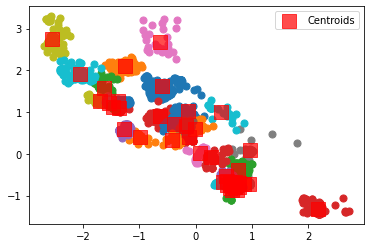

In [31]:
housing_km_rand, housing_y_means_rand = Experiment.kmeans(data=housing_dataset, n_clusters=44, init='random')

# Estimate KMeans Random

In [32]:
seeds_centroids = np.array([seeds_km_rand.cluster_centers_[label] for label in seeds_y_means_rand])
quantization_error: float = Estimator.compute_quantization_error_manually(data=seeds_dataset, centroids=seeds_centroids)
quantization_error   

0.30321943970202253

In [33]:
asia_centroids = np.array([asia_km_rand.cluster_centers_[label] for label in asia_y_means_rand])
quantization_error: float = Estimator.compute_quantization_error_manually(data=asia_dataset, centroids=asia_centroids)
quantization_error 

0.006110443393148805

In [34]:
housing_centroids = np.array([housing_km_rand.cluster_centers_[label] for label in housing_y_means_rand])
quantization_error: float = Estimator.compute_quantization_error_manually(data=housing_dataset, centroids=housing_centroids)
quantization_error 

0.05117110423087236